# Load Packages

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
from os import listdir
from PIL import Image
import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Load Data

In [5]:
#for f in os.listdir("../Springboard/Breast_Cancer_Capstone_Project/data/IDC_regular_ps50_idx5/"):
#    print(f)
base_path = "../Springboard/Breast_Cancer_Capstone_Project/data/IDC_regular_ps50_idx5/"
folder = listdir(base_path)
len(folder)

279

# Data Wrangling and EDA

First step is to create a dataframe that contains patient_id, label (0 = no cancer, 1 = cancer) and image path. 

The data comes in one large folder that contains subfolders for each patient. Those subfolders are labeled by the patient id. Each patient folder contains two folders labeled "0", no cancer, or "1", cancer, which contains images for both. 

In [7]:
#defining a function to create a dataframe with the patient_id, label (0 = no cancer, 1 = cancer), and image path

def process_images(root_folder):
    image_data = []

    for patient_folder in os.listdir(root_folder):
        patient_path = os.path.join(root_folder, patient_folder)
        if os.path.isdir(patient_path):
            for class_folder in os.listdir(patient_path):
                class_path = os.path.join(patient_path, class_folder)
                if os.path.isdir(class_path):
                    label = int(class_folder)  # subfolders are named 0 and 1
                    for image_file in os.listdir(class_path):
                        image_path = os.path.join(class_path, image_file)
                        image_data.append({'Patient_ID': patient_folder, 'Label': label, 'Image_Path': image_path})

    return pd.DataFrame(image_data)


In [11]:
root_folder = "../Springboard/Breast_Cancer_Capstone_Project/data/IDC_regular_ps50_idx5/"  
image_dataframe = process_images(root_folder)
print(image_dataframe.head())
print(len(image_dataframe))

  Patient_ID  Label                                         Image_Path
0       9036      0  ../Springboard/Breast_Cancer_Capstone_Project/...
1       9036      0  ../Springboard/Breast_Cancer_Capstone_Project/...
2       9036      0  ../Springboard/Breast_Cancer_Capstone_Project/...
3       9036      0  ../Springboard/Breast_Cancer_Capstone_Project/...
4       9036      0  ../Springboard/Breast_Cancer_Capstone_Project/...
277524


In [12]:
#looking at just one full image_path 
image_dataframe.Image_Path[1]

'../Springboard/Breast_Cancer_Capstone_Project/data/IDC_regular_ps50_idx5/9036/0/9036_idx5_x2951_y951_class0.png'

From the plot below and the actual value counts, can see have more not cancer images (count: 198738) than cancer iamges (count: 78786).  

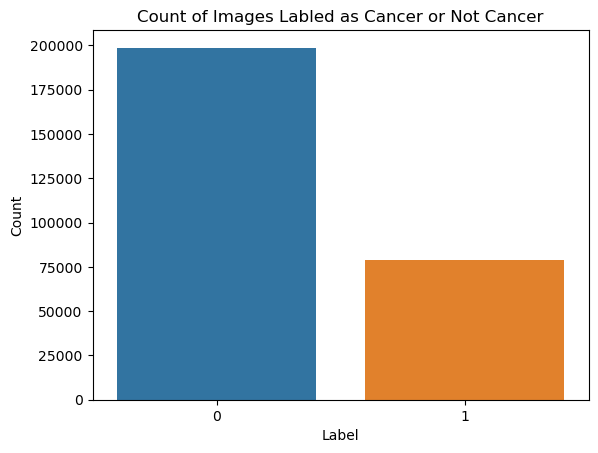

In [13]:
import seaborn as sns
#plot to see how many images are labeled 0 or 1
sns.countplot(x='Label', data=image_dataframe)

#actual count of how many images are labeled 0 or 1
image_dataframe.Label.value_counts()
plt.title('Count of Images Labled as Cancer or Not Cancer')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

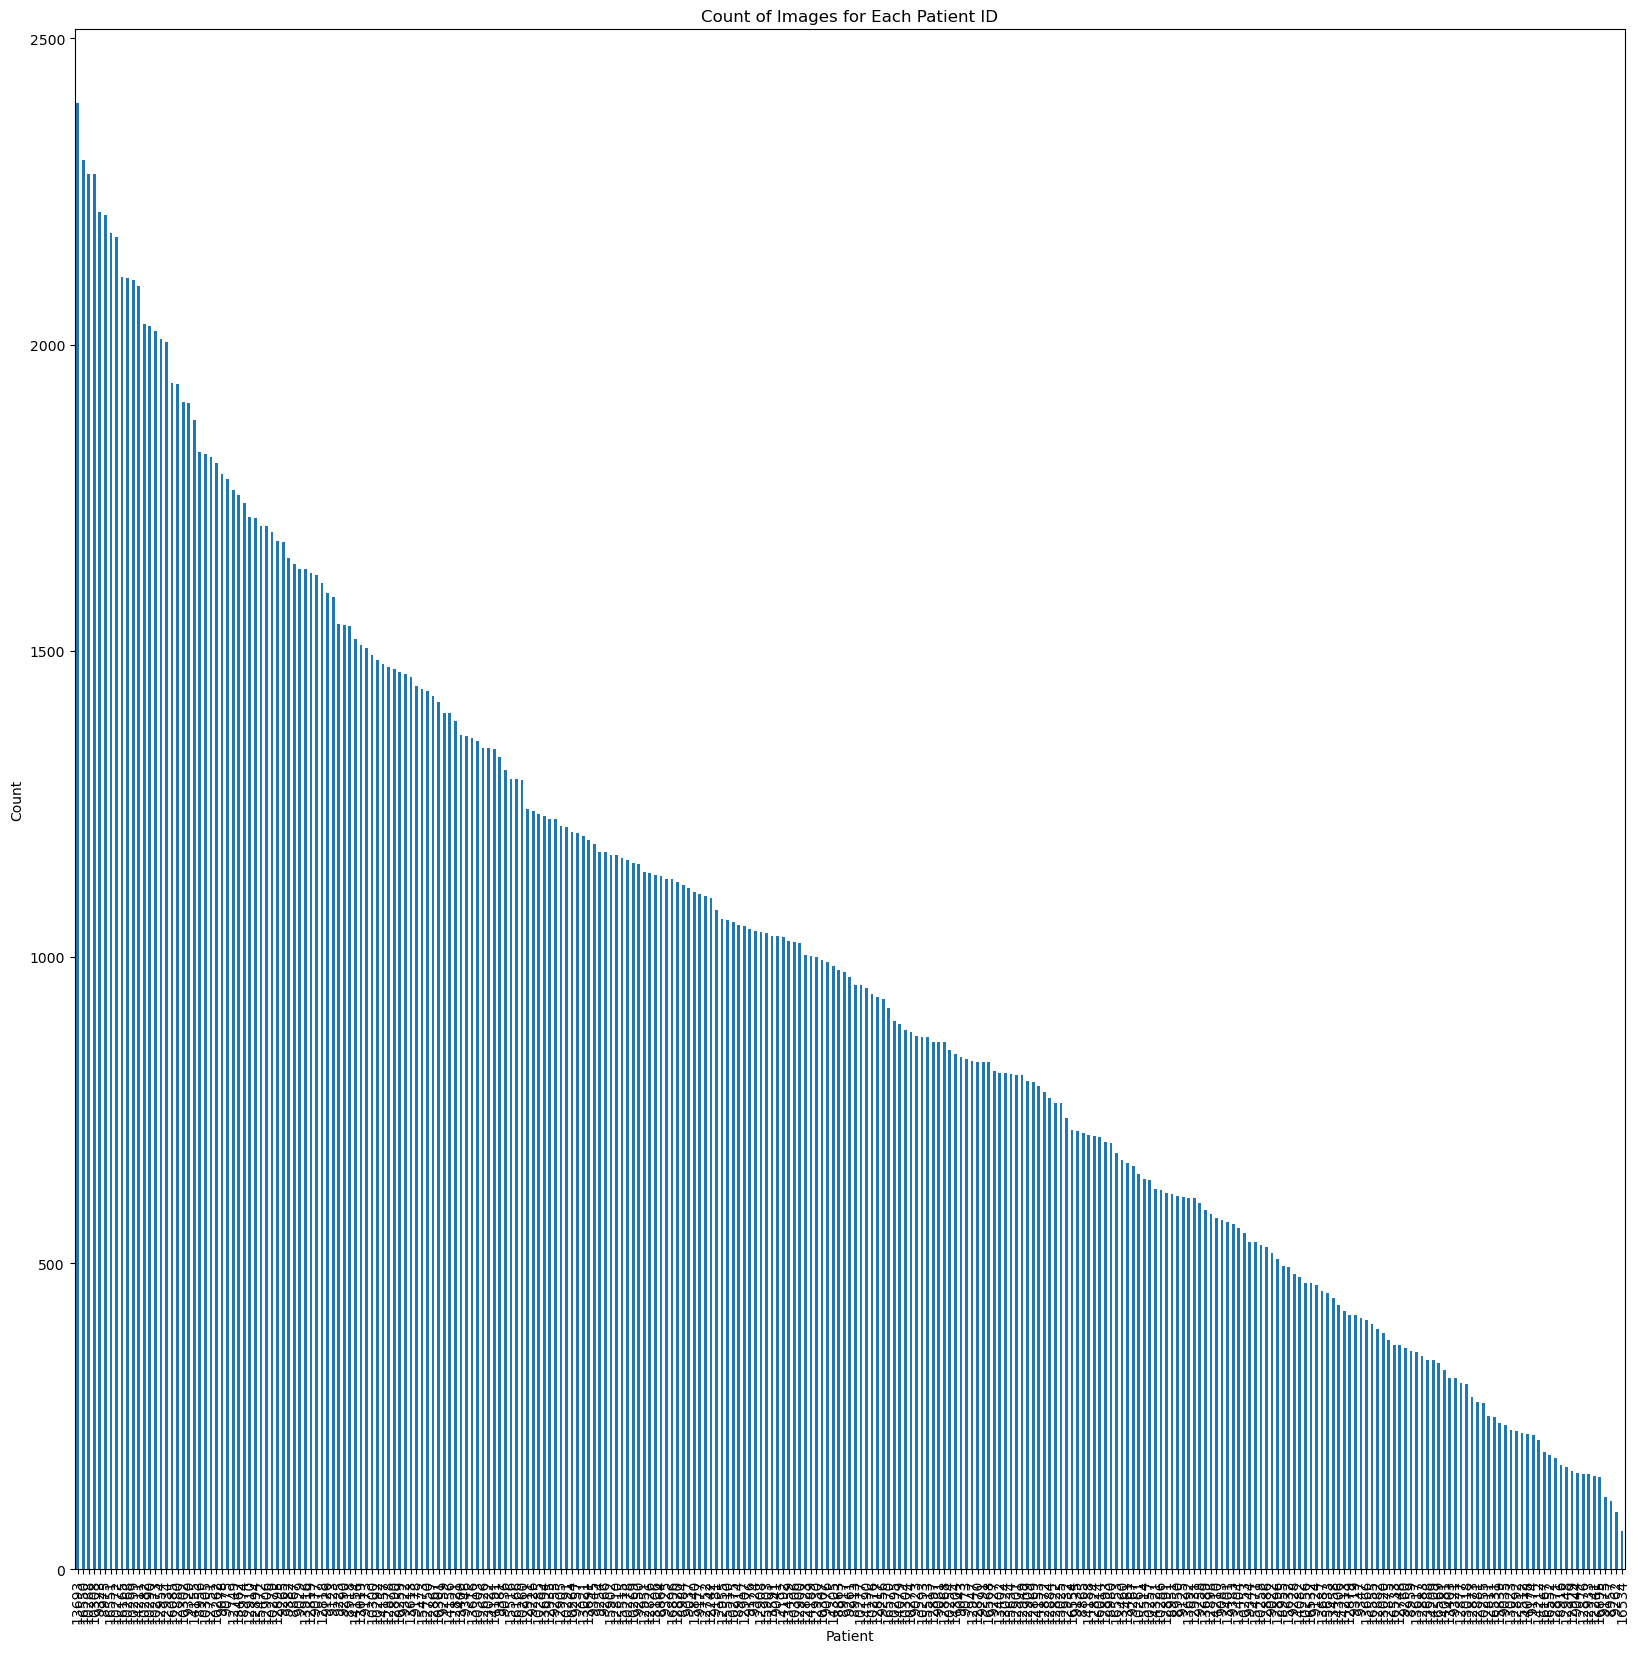

In [14]:
#actual count of how many images are labeled 0 or 1
patient_count_images= image_dataframe.Patient_ID.value_counts()

#quick glance to see if have the same number of patches for each patient
plt.figure(figsize=(20, 20))
patient_count_images.plot(kind='bar')
plt.title('Count of Images for Each Patient ID')
plt.xlabel('Patient')
plt.ylabel('Count')
plt.show()

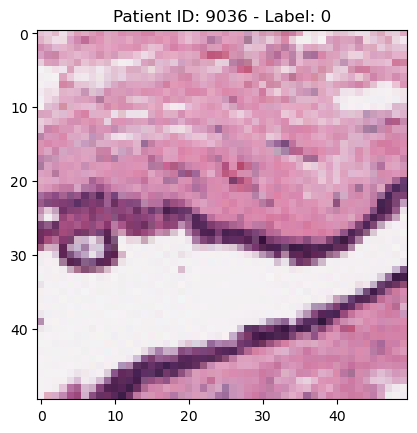

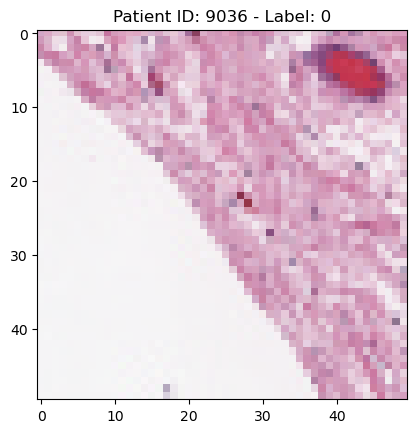

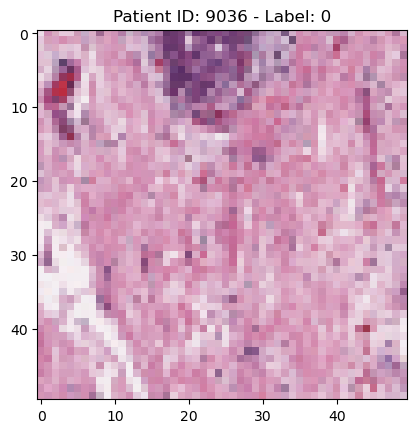

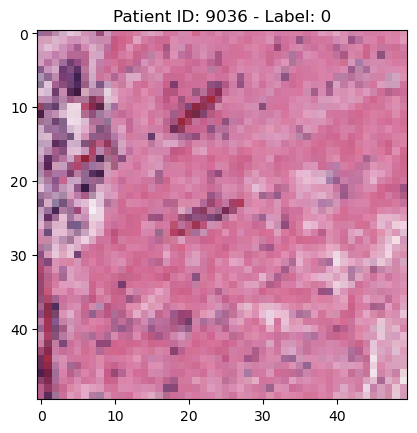

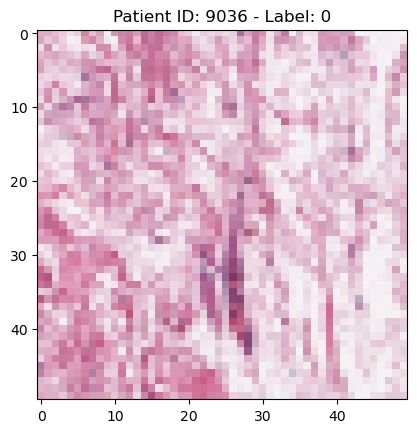

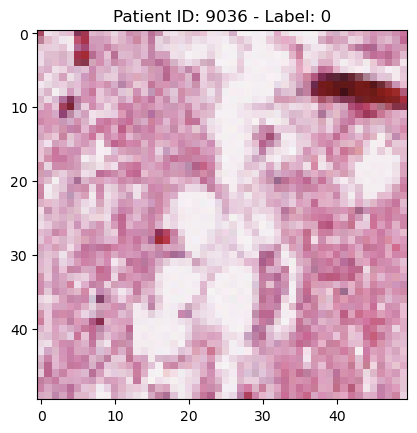

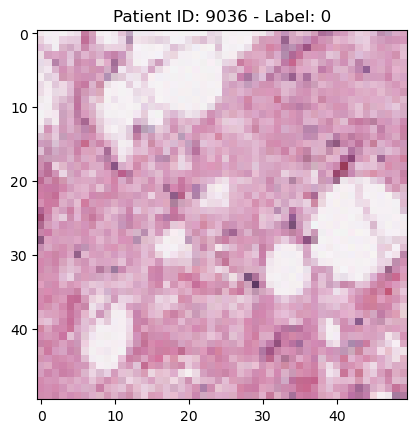

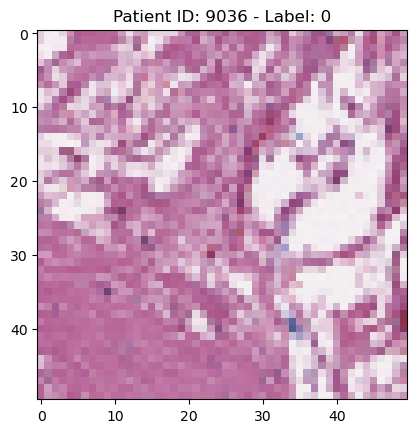

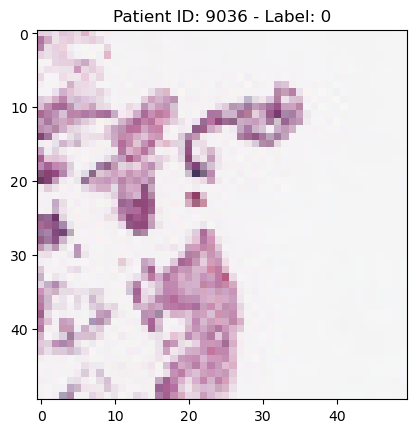

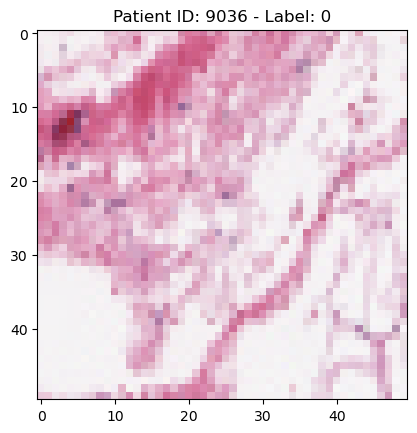

In [15]:
#plot the first 10 images
for index, row in image_dataframe.head(10).iterrows() :
    #get contents for patient_id, label and image_path 
    image_path = row['Image_Path']
    label = row['Label']
    patient= row['Patient_ID']
    #plot images
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f'Patient ID: {patient} - Label: {label}')
    plt.show()


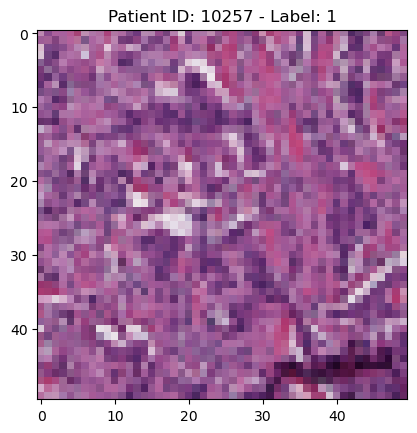

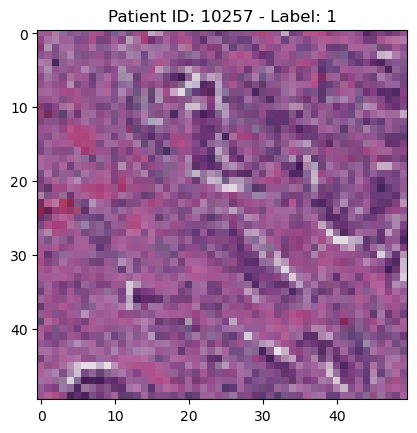

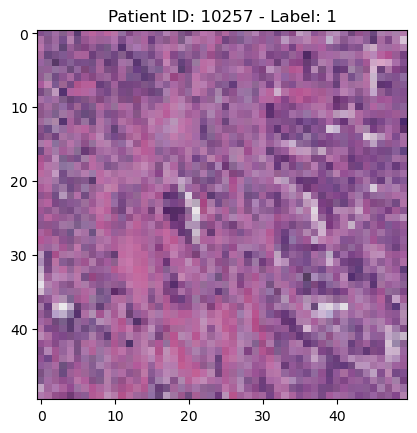

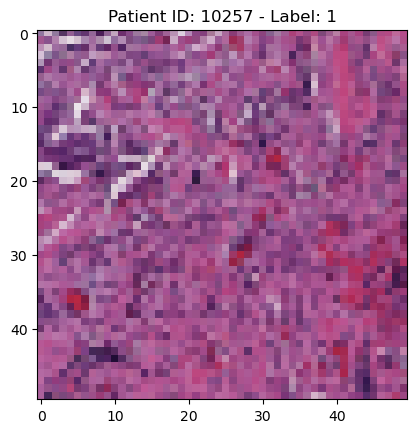

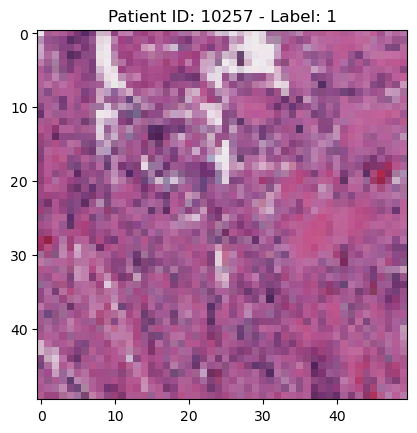

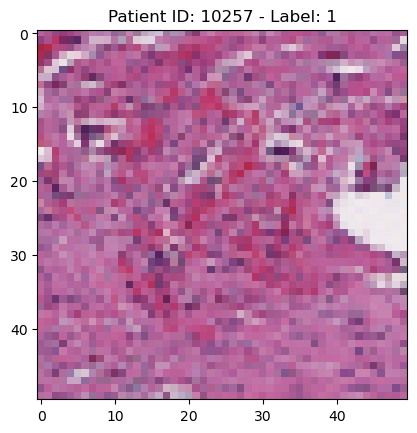

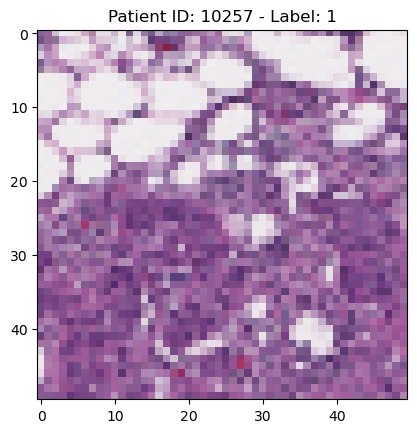

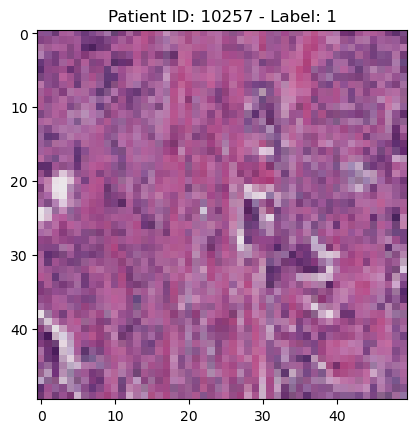

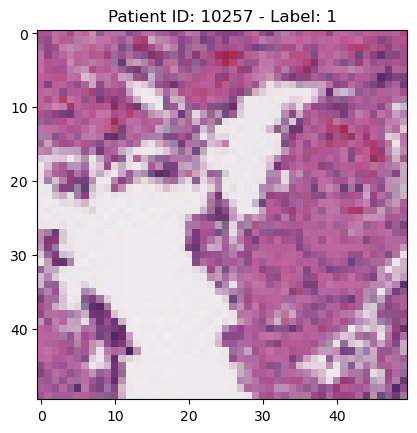

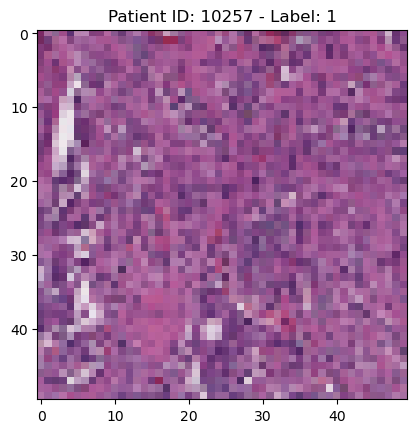

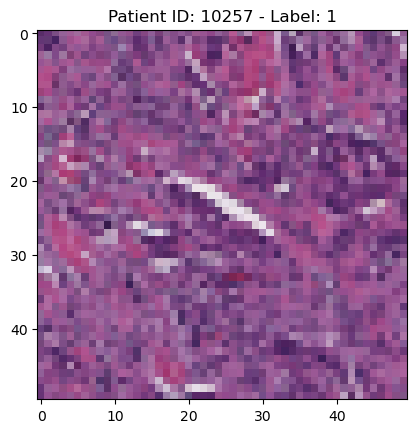

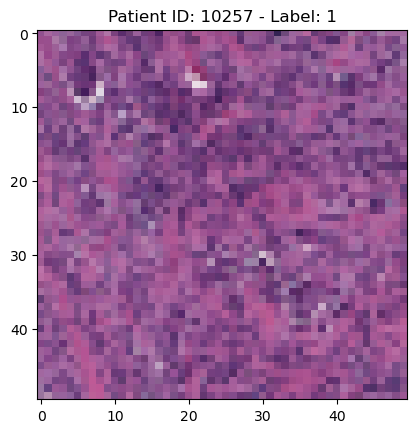

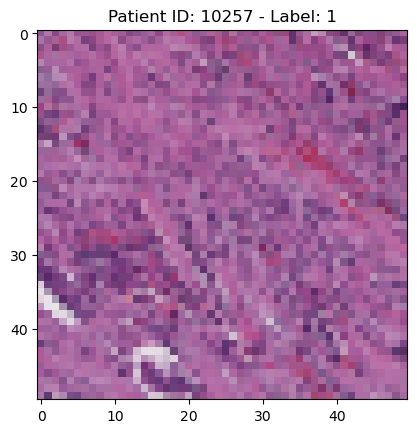

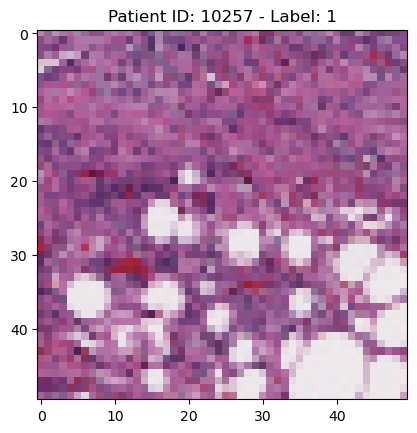

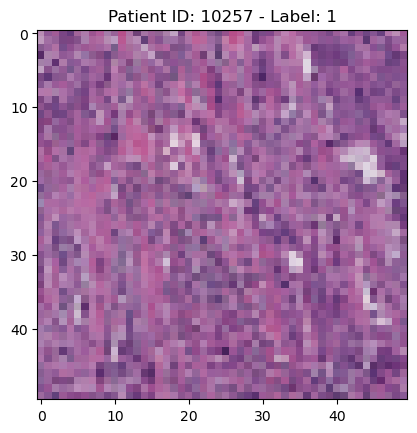

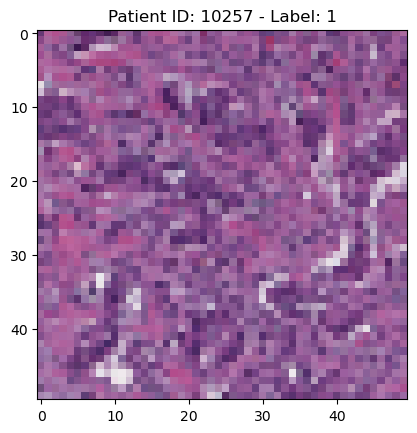

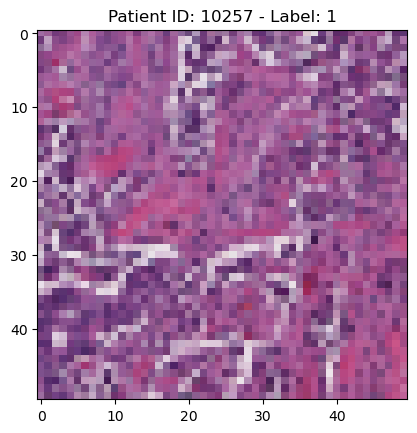

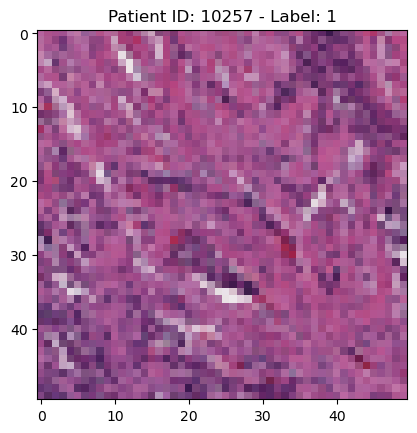

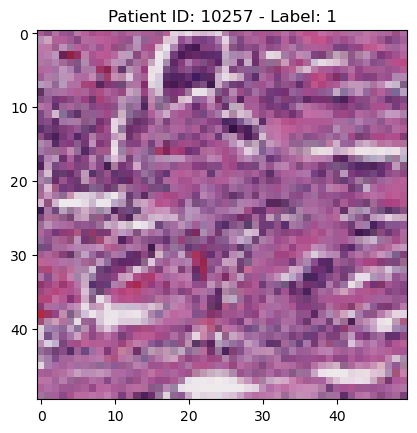

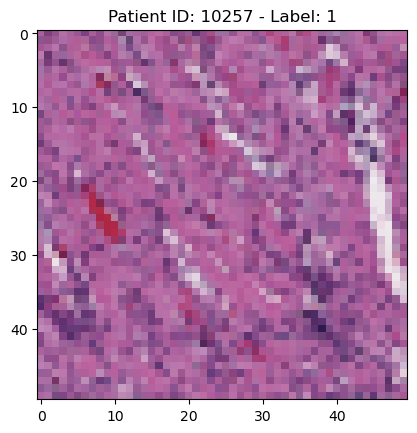

In [28]:
#plot 10 more images that are cancerous
for index, row in image_dataframe[4000:4020].iterrows() :
    #get contents for patient_id, label and image_path 
    image_path = row['Image_Path']
    label = row['Label']
    patient= row['Patient_ID']
    #plot images
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f'Patient ID: {patient} - Label: {label}')
    plt.show()


# Preprocess Data

1. Do I want to partition the data into AFTER I shuffle the data?
    TRAIN (70%)
    Validation (20%)
    Test (10%)
    
2. Do I need to do more above in the data wrangling and EDA?

Normalize values

In [26]:
#create a function to normalize values 
#used parts of this code to create this function: https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python
def normalize_image(image_path):
    #load the image using cv2.imread
    img = cv2.imread(image_path)
    #normalize the pixel values so between 0 and 1
    img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img_normalized

# Apply normalization to the 'ImagePath' column
image_dataframe['Normalized_Image'] = image_dataframe['Image_Path'].apply(normalize_image)


In [27]:
image_dataframe.head()

,Patient_ID,Label,Image_Path,Normalized_Image
0,9036,0,../Springboard/Breast_Cancer_Capstone_Project/...,"[[[0.8448276, 0.76293105, 0.91810346], [0.8922..."
1,9036,0,../Springboard/Breast_Cancer_Capstone_Project/...,"[[[0.74752474, 0.59405935, 0.80198014], [0.742..."
2,9036,0,../Springboard/Breast_Cancer_Capstone_Project/...,"[[[0.92647064, 0.87745106, 0.9460784], [0.6764..."
3,9036,0,../Springboard/Breast_Cancer_Capstone_Project/...,"[[[0.58371043, 0.3891403, 0.53846157], [0.5339..."
4,9036,0,../Springboard/Breast_Cancer_Capstone_Project/...,"[[[0.7208122, 0.5888325, 0.8781726], [0.746192..."
